In [ ]:
import pandas as pd
df= pd.read_csv('' \
'_data.csv')
# Ensure 'Bill_Date_Friday_Friday' is in datetime format
df['Bill_Date_Friday_Friday'] = pd.to_datetime(df['Bill_Date_Friday'], errors='coerce')

# Drop invalid dates (if any)
df = df.dropna(subset=['Bill_Date_Friday'])


In [26]:
# Ensure 'Bill_Date_Friday' is in datetime format
df['Bill_Date_Friday'] = pd.to_datetime(df['Bill_Date_Friday'])

# Function to get week label
def get_week_label(date):
    month = date.strftime('%b')  # Get short month name (Jan, Feb, etc.)
    week_number = (date.day - 1) // 7 + 1  # Calculate week number in the month
    return f"{month}-W{week_number}"

# Apply function after conversion
df['Week_Label'] = df['Bill_Date_Friday'].apply(get_week_label)


In [27]:
# Function to generate week labels like "Jan-W1"
def get_week_label(date):
    month = date.strftime('%b')  # Get short month name (Jan, Feb, etc.)
    week_number = (date.day - 1) // 7 + 1  # Calculate week number in the month
    return f"{month}-W{week_number}"

# Apply function
df['Week_Label'] = df['Bill_Date_Friday'].apply(get_week_label)


In [32]:
df.to_csv("week_categorized_data.csv", index=False)


In [29]:
# Aggregate: Sum up total persons utilizing the policy per week
weekly_stats = df.groupby('Week_Label').agg(
    Total_Persons=('Computed_Total_Persons', 'sum')
).reset_index()


In [30]:
# Define correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a sorting key using month index and week number
weekly_stats['Sort_Order'] = weekly_stats['Week_Label'].apply(
    lambda x: (month_order.index(x.split('-')[0]), int(x.split('-W')[1]))
)

# Sort the dataframe based on this order
weekly_stats = weekly_stats.sort_values('Sort_Order').drop(columns=['Sort_Order'])


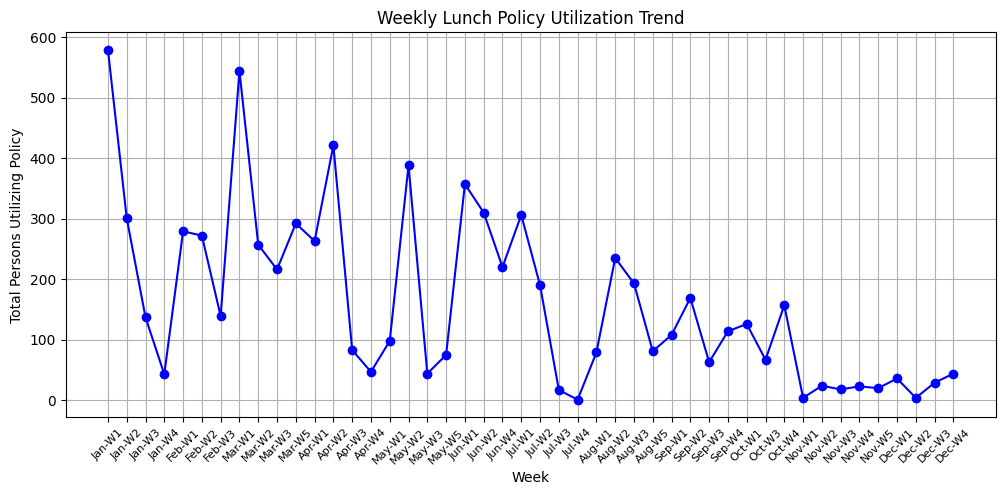

In [31]:
import matplotlib.pyplot as plt

# Plot the weekly trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_stats['Week_Label'], weekly_stats['Total_Persons'], marker='o', linestyle='-', color='b')
plt.xlabel('Week')
plt.ylabel('Total Persons Utilizing Policy')
plt.title('Weekly Lunch Policy Utilization Trend')
plt.xticks(rotation=45, fontsize=8)
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('week_categorized_data.csv')

# Convert date columns to datetime
df['Claim Date'] = pd.to_datetime(df['Claim Date'])
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

# Create the 'diff_claim_bill' column (difference in days)
df['diff_claim_bill'] = (df['Claim Date'] - df['Bill_Date']).dt.days

# Identify duplicate claims for the same Employee ID within the same week
duplicate_bills = df[df.duplicated(subset=['Employee ID', 'Week_Label', 'Bill_No'], keep=False)]

# Keep the row where 'diff_claim_bill' is closest to 14
df_filtered = duplicate_bills.loc[duplicate_bills.groupby(['Employee ID', 'Week_Label', 'Bill_No'])['diff_claim_bill'].apply(lambda x: (x - 14).abs().idxmin())]

# Save the filtered dataset to an Excel file
df_filtered.to_excel("filtered_duplicate_claims.xlsx", index=False)


In [49]:
import pandas as pd

# Load dataset
df = pd.read_csv("week_categorized_data.csv")

# Convert date columns to datetime
df['Claim Date'] = pd.to_datetime(df['Claim Date'])
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

# Create 'diff_claim_bill' column (difference in days)
df['diff_claim_bill'] = (df['Claim Date'] - df['Bill_Date']).dt.days

# Identify duplicate claims for the same Employee ID within the same week
duplicate_bills = df[df.duplicated(subset=['Employee ID', 'Week_Label', 'Bill_No'], keep=False)]

# Keep only the row where 'diff_claim_bill' is closest to 14
df_filtered = duplicate_bills.loc[
    duplicate_bills.groupby(['Employee ID', 'Week_Label', 'Bill_No'])['diff_claim_bill']
    .apply(lambda x: (x - 14).abs().idxmin())
]

# Save the filtered dataset to an Excel file
df_filtered.to_excel("data_after_duplicates.xlsx", index=False)

print("✅ Filtered data saved as 'filtered_duplicate_claims.xlsx'")


✅ Filtered data saved as 'filtered_duplicate_claims.xlsx'


In [50]:
import pandas as pd

# Load dataset
df = pd.read_csv("week_categorized_data.csv")

# Convert date columns to datetime
df['Claim Date'] = pd.to_datetime(df['Claim Date'])
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

# Create 'diff_claim_bill' column (difference in days)
df['diff_claim_bill'] = (df['Claim Date'] - df['Bill_Date']).dt.days

# Filter out rows where 'diff_claim_bill' > 14
df = df[df['diff_claim_bill'] <= 14]

# Identify duplicate claims for the same Employee ID within the same week
duplicate_bills = df[df.duplicated(subset=['Employee ID', 'Week_Label', 'Bill_No'], keep=False)]

# Keep only the row where 'diff_claim_bill' is closest to 14
df_filtered = duplicate_bills.loc[
    duplicate_bills.groupby(['Employee ID', 'Week_Label', 'Bill_No'])['diff_claim_bill']
    .apply(lambda x: (x - 14).abs().idxmin())
]

# Save the filtered dataset to an Excel file
df_filtered.to_excel("data_after_duplicates_removal.xlsx", index=False)

print("✅ Filtered data saved as 'data_after_duplicates.xlsx'")


✅ Filtered data saved as 'data_after_duplicates.xlsx'


In [54]:
import pandas as pd

# Load dataset
df = pd.read_csv("data_after_duplicates_removal.csv")

# Convert date columns to datetime
df['Claim Date'] = pd.to_datetime(df['Claim Date'])
df['Bill_Date'] = pd.to_datetime(df['Bill_Date'])

# Create 'diff_claim_bill' column (difference in days)
df['diff_claim_bill'] = (df['Claim Date'] - df['Bill_Date']).dt.days

# Identify duplicate claims for the same Employee ID, Week_Label, and Bill_No
duplicate_bills = df[df.duplicated(subset=['Employee ID', 'Week_Label', 'Bill_No'], keep=False)]

# Filter only those where 'diff_claim_bill' is ≤ 14
valid_bills = duplicate_bills[duplicate_bills['diff_claim_bill'] <= 14]

# Keep only the row where 'diff_claim_bill' is closest to 14
df_final = valid_bills.loc[
    valid_bills.groupby(['Employee ID', 'Week_Label', 'Bill_No'])['diff_claim_bill']
    .apply(lambda x: (x - 14).abs().idxmin())
]

# Save the filtered dataset to an Excel file
df_final.to_excel("data_after_duplicates.xlsx", index=False)

print("✅ Filtered data saved as 'data_after_duplicates.xlsx'")


FileNotFoundError: [Errno 2] No such file or directory: 'data_after_duplicates_removal.csv'

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv(".csv")

# Convert date columns to datetime (removing timestamps)
df['Claim Date'] = pd.to_datetime(df['Claim Date']).dt.date
df['Bill_Date'] = pd.to_datetime(df['Bill_Date']).dt.date

# Drop the unnecessary column
if 'Bill_Date_Friday_Friday' in df.columns:
    df.drop(columns=['Bill_Date_Friday_Friday'], inplace=True)

# Convert 'Week_Label' format to "Month W1, W2, W3, W4"
df['Month'] = pd.to_datetime(df['Bill_Date']).dt.strftime('%b')  # Extract month as short name (Jan, Feb)
df['Week'] = df['Week_Label'].str.extract('(\d+)')[0]  # Extract week number
df['Week_Label'] = df['Month'] + " W" + df['Week']  # Format it as "Jan W1, Feb W2, ..."

# Save the cleaned dataset to an Excel file
df.to_excel("final_corrected_data.xlsx", index=False)

print("✅ Cleaned data saved as 'formatted_week_data.xlsx'")
